Пункт 1

In [13]:
import os
import glob
from PIL import Image
from typing import Tuple, Any
import numpy as np
import pandas as pd
import torch.nn as nn
import torch
import torchvision
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt
import cv2
import matplotlib.pyplot as plt
import torch.optim as optim


In [14]:
class CustomImageDataset(Dataset):
    
    def __init__(self, file_list, transform: Any = None, target_transform: Any = None) -> None:
        self.file_list = file_list
        self.transform = transform
        self.target_transform = target_transform
        

    def __len__(self) -> int:
        self.filelength = len(self.file_list)
        return self.filelength
    
    
    def __getitem__(self, index: int) -> Tuple[torch.tensor, int]:
        path_to_image = self.file_list[index]
        image = Image.open(path_to_image)
        print(path_to_image)
    
        if 'rose' in path_to_image:
            label = 1
        elif 'tulip' in path_to_image:
            label = 0
        
        print(label)
        
        return image, label

список путей к фотографиям

In [15]:
images_list = []


Пункт 2

создание списков путей для тренировочных, тестовых и валидационных изображений

In [16]:
train_dataset = images_list[0 : int(len(images_list)*0.8)]
test_dataset = images_list[int(len(images_list)*0.8) : int(len(images_list)*0.9)]
val_dataset = images_list[int(len(images_list)*0.9) : int(len(images_list))]

Проверка на сбалансированность

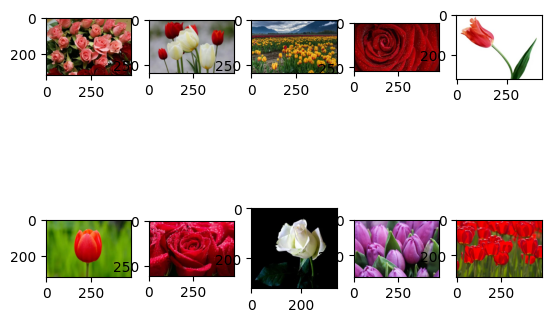

In [17]:
rand_list = np.random.randint(1,len(images_list),size=10)

fig = plt.figure()
i=1
for rand in rand_list:
    fig.add_subplot(2,5,i)
    image = Image.open(images_list[rand])
    plt.imshow(image)
    i+=1

plt.show()


Пункт 3

In [18]:
class CNN(nn.Module):
    def __init__(self) -> None:
        super(CNN, self).__init__()

        self.conv_1 = nn.Conv2d(3, 16, kernel_size=3, padding=0, stride=2)
        self.conv_2 = nn.Conv2d(16, 32, kernel_size=3, padding=0, stride=2)
        self.conv_3 = nn.Conv2d(32, 64, kernel_size=3, padding=0, stride=2)

        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.1)
        self.max_pool = nn.MaxPool2d(2)

        self.fc_1 = nn.Linear(576, 10)
        self.fc_2 = nn.Linear(10, 1)

    def forward(self, x: torch.tensor) -> torch.tensor:
        output = self.relu(self.conv_1(x))
        output = self.max_pool(output)
        output = self.relu(self.conv_2(output))
        output = self.max_pool(output)
        output = self.relu(self.conv_3(output))
        output = self.max_pool(output)

        output = nn.Flatten()(output)
        output = self.relu(self.fc_1(output))
        output = nn.Sigmoid()(self.fc_2(output))
        return output

Пункт 4

In [ ]:

custom_transforms = torchvision.transforms.Compose([torchvision.transforms.ToTensor(),
                                                    torchvision.transforms.Resize(
                                                        (224, 224)),
                                                    torchvision.transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))])


train_data = CustomImageDataset(train_dataset, transform=custom_transforms)
test_data = CustomImageDataset(test_dataset, transform=custom_transforms)
val_data = CustomImageDataset(val_dataset, transform=custom_transforms)